# Analysis notebook: `SU2020b_CRY_onspill-LH_au`  

## Define analysis name

In [1]:
ana_label = "SU2020b_CRY_onspill-LH_au"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020b_CRY_onspill-LH_au

analysis.csv  events.parquet  info.txt	   SU2020b_CRY_onspill-LH_au.log
cut_flow.csv  hists.h5	      results.pkl  SU2020b_CRY_onspill-LH_au.yaml


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020b_CRY_onspill-LH_au


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020b_CRY_onspill-LH_au/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020b_CRY_onspill-LH_au/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020b_CRY_onspill-LH_au/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020b_CRY_onspill-LH_au/analysis.csv
[Load] ✅ Successfully loaded ak.Array from ../../../output/results/SU2020b_CRY_onspill-LH_au/events.parquet
[Load] ✅ Loaded info from ../../../output/results/SU2020b_CRY_onspill-LH_au/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"])

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,2189973,100.000000,100.000000,No selection applied
1,has_trk_front,Preselection,2188059,99.912602,99.912602,Tracks intersect tracker entrance
2,is_reco_electron,Preselection,2098551,95.825428,95.909251,Electron track fits
3,is_downstream,Preselection,1272685,58.114187,60.645893,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselection,914920,41.777684,71.888959,One reco electron / event
5,is_truth_electron,Preselection,271686,12.405906,29.695055,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,215843,9.855966,79.445757,Track fit quality > 0.2
7,within_t0,Tracker,172795,7.890280,80.055874,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,171006,7.808589,98.964669,>20 active tracker hits
9,within_t0err,Tracker,156015,7.124060,91.233641,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"])

,Type,Events Passing (k),Total Events (N),Efficiency [%],Efficiency Error Low [%],Efficiency Error High [%],Rate [$\text{day}^{-1}$],Rate Error Low [$\text{day}^{-1}$],Rate Error High [$\text{day}^{-1}$]
0,Signal (wide),16172,4000000,0.404,0.401,0.407,88.630,87.937,89.329
1,Signal (ext),2640,4000000,0.066,0.065,0.067,14.468,14.188,14.754
2,Signal (sig),315,4000000,0.008,0.007,0.008,1.726,1.630,1.829
3,Veto (wide),7,16172,99.957,0.030,0.063,0.038,0.024,0.059
4,Veto (ext),1,2640,99.962,0.014,0.099,0.005,0.001,0.018
5,Veto (sig),0,315,100.000,0.000,0.316,0.000,0.000,0.006


### Histograms

In [8]:
# Setup draw for this cutset
draw = Draw(cutset_name=ana_label.split('_')[0])
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_au/h1o_1x3_mom_windows.png


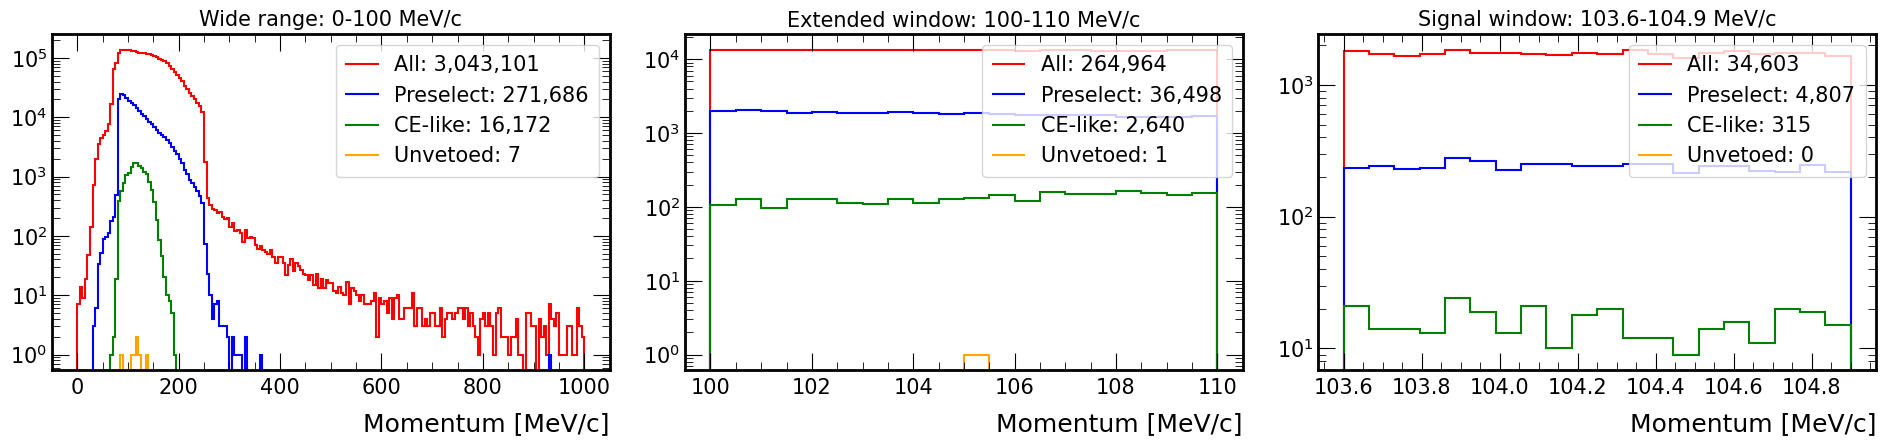

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_au/h1o_3x3_summary.png


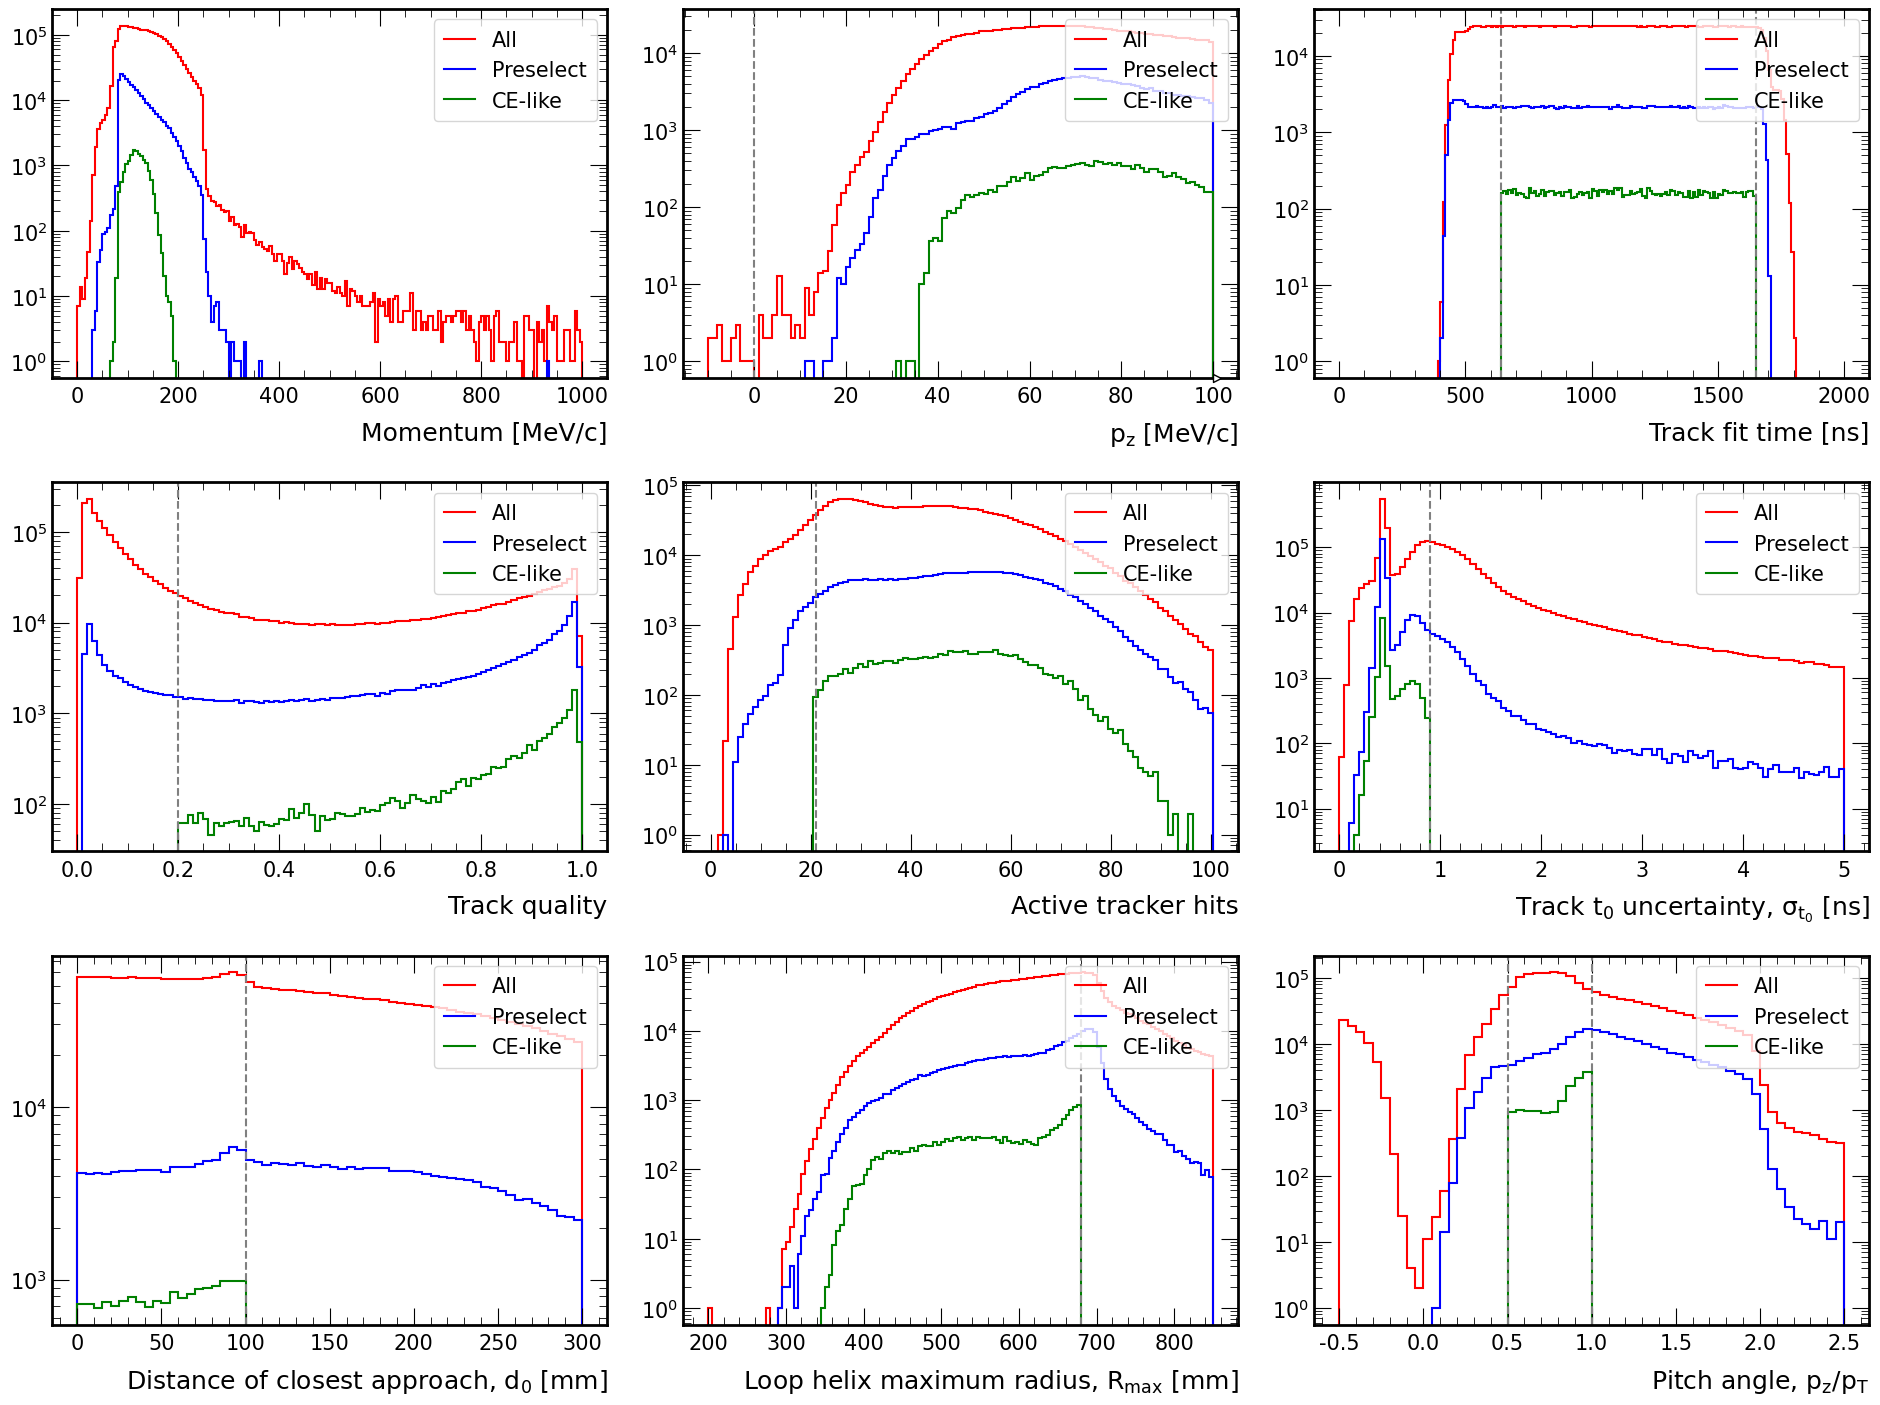

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020b_CRY_onspill-LH_au/h1o_crv_.png


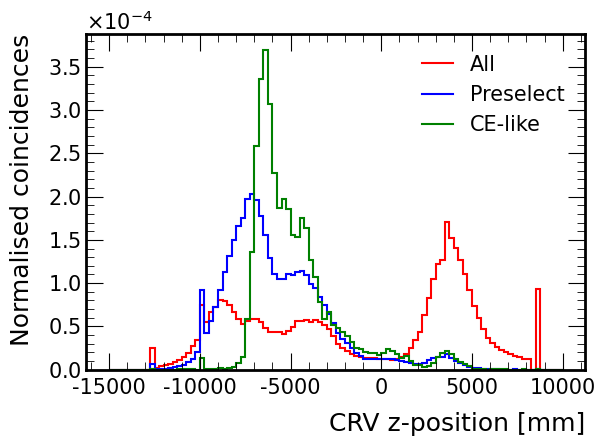

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_.png") 

### Background event info

In [12]:
print(results["event_info"])

  Index:            25
  Subrun:           [3113]
  Event:            [86303]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000034.root
  Track time [ns]:  1004.101804
  Coinc time [ns]:  853.986267
  dt [ns]:          150.115536
----------------------------------------
  Index:            57
  Subrun:           [4846]
  Event:            [283585]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00000075.root
  Track time [ns]:  1445.887901
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            121
  Subrun:           [10372]
  Event:            [47517]
  File:             nts.mu2e.CosmicCRYSignalAllOnSpillTriggered.MDC2020au_best_v1_3_v06_03_00.001202_00008885.root
  Track time [ns]:  1049.419812
  Coinc time [ns]:  None
  dt [ns]:          N/A
----------------------------------------
  Index:            221
  Subrun:      

In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))

[pyprint] ⭐️ Initialised Print with verbose = False and precision = 1
[pyprint] ⭐️ Printing 7 event(s)...

-------------------------------------------------------------------------------------
evt.run: 1202
evt.subrun: 3113
evt.event: 86303
crv.crvcoincs.time: [854]
crv.crvcoincs.nHits: [18]
crv.crvcoincs.pos.fCoordinates.fZ: [2.56e+03]
at_trk_front: [[False, False, False, True, False, False], [False, False, ..., False]]
has_trk_front: [True, True]
is_reco_electron: [True, False]
is_downstream: [True, True]
one_reco_electron: [True, True]
one_reco_electron_per_event: True
is_truth_electron: [True, True]
good_trkqual: [True, True]
within_t0: [True, True]
has_hits: [True, True]
within_t0err: [True, True]
within_d0: [True, True]
within_pitch_angle_lo: [True, True]
within_pitch_angle_hi: [True, True]
within_lhr_max_lo: [True, True]
within_lhr_max_hi: [True, True]
unvetoed: [True, False]
within_ext_win: [False, False]
within_sig_win: [False, False]
preselect: [True, False]
CE_like: [True, F